In [10]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

#**Univariate**

In [2]:
dataset = pd.read_csv("salary_data.csv")
dataset.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


##Using Inbuilt functions

In [52]:
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, 1].values
regressor = LinearRegression(fit_intercept=True)
regressor.fit(X, Y)
# print(regressor.predict(X))
print("w0 = ",regressor.intercept_)
print("w1 = ",regressor.coef_[0])

w0 =  25792.200198668696
w1 =  9449.962321455076


##Using Closed form

In [67]:
def closed_form(X,Y):
  weight_predicted = np.linalg.inv(np.matmul(X.transpose(),X)) @ X.transpose() @ Y
  y_predicted = X @ weight_predicted
  return weight_predicted, y_predicted

X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, 1].values

X = np.concatenate((X,np.ones((X.shape[0],1))),axis=1)
weight_predicted, y_predicted = closed_form(X,Y)
#print(X.shape)
print("w0 = ",weight_predicted[1])
print("w1 = ",weight_predicted[0])


w0 =  25792.200198668677
w1 =  9449.962321455096


##Using Least Square Error

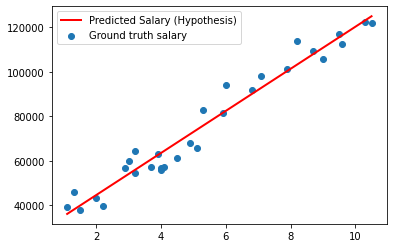

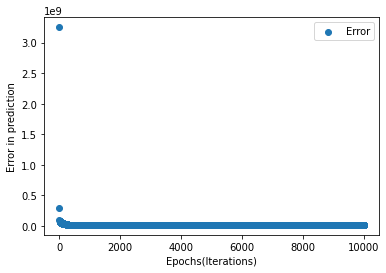

w0 =  [25792.20019867]
w1 =  [9449.96232146]


In [64]:
x = (dataset.iloc[:,0].values).reshape(-1,1)
y = (dataset.iloc[:,1].values).reshape(-1,1)
plt.scatter(x,y,label='Ground truth salary')
n = len(x)

def Loss_function(x,y,w0,w1,n):
  y_predicted=w1*x+w0
  err=sum((y-y_predicted)**2)/(2*n)
  return err
  
epoch =10000
w = np.array([0.0, 0.0]).reshape(-1,1)
err=[]
alpha=0.01

for i in range(epoch):
  err.append(Loss_function(x,y,w[0],w[1],n))
  dw0 = sum((-2/n)*(y-((w[1]*x)+w[0])))
  dw1 = sum((-2/n)*x*(y-((w[1]*x)+w[0])))
  w[1]=w[1]-(alpha*dw1)
  w[0]=w[0]-(alpha*dw0)

y_predicted = w[0] + w[1]*x 
#print(y_predicted)
plt.plot(x,y_predicted,'r',linewidth=2,label='Predicted Salary (Hypothesis)')
plt.legend()
plt.show()
plt.scatter([range(epoch)],err,label="Error")
plt.xlabel('Epochs(Iterations)')
plt.ylabel('Error in prediction')
plt.legend()
plt.show()

print("w0 = ",w[0])
print("w1 = ",w[1])

###**Question 3:**

####**Linear Regression using Maximum Likelihood Estimation**

In [ ]:
X = np.array(dataset.iloc[:,0].values.reshape(-1,1))
Y = np.array(dataset.iloc[:,1].values.reshape(-1,1))

w1 = np.sum((X-np.mean(X))* (Y-np.mean(Y)))/np.sum((X-np.mean(X))**2)
w0 = np.mean(Y)-w1*np.mean(X) 

print("w0 = ",w0)
print("w1 = ",w1)

#**Multivariate**

In [107]:
dataset2 = pd.read_csv("stats_females.csv")
dataset2.head()

,Height,momheight,dadheight
0,66.0,66.0,71.0
1,64.0,62.0,68.0
2,64.0,65.0,70.0
3,69.0,66.0,76.0
4,66.0,63.0,70.0


##Using Inbuilt functions

In [14]:
x = dataset2.iloc[:, 1:].values
y = dataset2.iloc[:, :1].values

regressor = LinearRegression(fit_intercept=True)
regressor.fit(x, y)
#print(regressor.predict(X))
print("w0 = ",regressor.intercept_)
print("w1 = ",regressor.coef_[0][0])
print("w2 = ",regressor.coef_[0][1])

w0 =  [18.54725207]
w1 =  0.30350557940727957
w2 =  0.3878555878957484


Using Least Square Error

In [114]:
np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,y))
  
x = np.array(dataset2.iloc[:,[1,2]].values.reshape(-1,2))
y = np.array(dataset2.iloc[:,0].values.reshape(-1,1))

X = np.concatenate((x,np.ones((x.shape[0],1))),axis=1)
print(np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,y)))


[[ 0.30350558]
 [ 0.38785559]
 [18.54725207]]


[18.50519781  0.30400098  0.38800647]


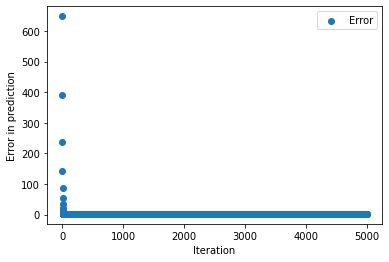

In [109]:
x = np.array(dataset2.iloc[:,[1,2]].values.reshape(-1,2))
y = np.array(dataset2.iloc[:,0].values.reshape(-1,1))
epoch=5000
def Gradient_descent(n,w,x,y):
  alpha=0.0002
  weights=[]
  error=[]
  for j in range(epoch):     
    dw0=0
    dw1=0
    dw2=0
    for i in range(len(x)):
      dw0 += -(y[i] - w[0] - w[1]*x[i][0] - w[2]*x[i][1])
      dw1 += -(y[i] - w[0] - w[1]*x[i][0] - w[2]*x[i][1])*x[i][0]
      dw2 += -(y[i] - w[0] - w[1]*x[i][0] - w[2]*x[i][1])*x[i][1]
    w[0] = w[0] - alpha*dw0/n
    w[1] = w[1] - alpha*dw1/n
    w[2] = w[2] - alpha*dw2/n
    weights.append(w)
    res=0
    for i in range(len(y)):
      res += (y[i] - w[0] - w[1]*x[i][0] - w[2]*x[i][1])**2/(2*n)
    error.append([res,w[0],w[1],w[2]])

  return weights,error
n = len(x)
w=np.array([18.5,0.0,0.0])
w.reshape(-1,3)
weights,error=Gradient_descent(n,w,x,y)
print(weights[-1])
err_y=[]
for res in error:
  err_y.append(res[0])
plt.scatter([range(epoch)],err_y,label="Error")
plt.xlabel("Iteration")
plt.ylabel("Error in prediction")
plt.legend()
plt.show()

